In [92]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up(stepup=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import analysis2 as a2
from flutype.models import Spot
import django
django.setup()
from importlib import reload
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing
import preprocessing as pp
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [93]:
sns.set(style="whitegrid")

## Load Elisa Data

In [94]:
reload(preprocessing)
reload(a2)
studies = ["elisa_2018_04_23"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
data_elisa = a2.Data(spots_dj=spots_dj)

## Normalization by Analyte Buffer


In [96]:
frames = {}
for cn, d in  data_elisa.spots_pd.groupby(["Collection","Analyte Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Ligand Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm1 = a2.Data(spots_pd=spots_pd_norm)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Normalization by Ligand Buffer


In [97]:
frames = {}
for cn, d in  data_elisa.spots_pd.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm2 = a2.Data(spots_pd=spots_pd_norm,impute=True)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Normalization on Both

In [98]:
frames = {}
for cn, d in  data_elisa_norm1.spots_pd.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm3 = a2.Data(spots_pd=spots_pd_norm,impute=True)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Normalization on Both and Subtract Underground

In [99]:
frames = {}
for cn, d in  data_elisa.spots_pd.groupby(["Collection","Analyte Batch"]):
    d["Intensity"] = d["Intensity"]-d[d["Ligand Batch"] == "Empty"]["Intensity"].median()
    d["Intensity"] = d["Intensity"]/d[d["Ligand Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)

frames = {}
for cn, d in  spots_pd_norm.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
spots_pd_norm.at[spots_pd_norm["Ligand Batch"] == "Empty","Intensity"] = 0
data_elisa_norm4 = a2.Data(spots_pd=spots_pd_norm,impute=True)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Relativ Standard Deviation of Analyte Batch 
The relative standard deviation (coeffcient of variation) of well intensities with similar viruses and peptides are calculated. Intensities are considered from all microwell plates contained in the studies. Relative standard deviation  in mean units of the respective dataset. The relative standard deviation (error) is containing both sources of systematic and random errors. 

In [127]:

ma_ana = data_elisa.mean_on_analyte_batch().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]
ma_lig = data_elisa.mean_on_analyte_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
ma_lig_norm1 = data_elisa_norm1.mean_on_analyte_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
ma_lig_norm2 = data_elisa_norm2.mean_on_analyte_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
ma_lig_norm3 = data_elisa_norm3.mean_on_analyte_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
ma_lig_norm4 = data_elisa_norm4.mean_on_analyte_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]

/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/preprocessing.py:93: RuntimeWarning:

invalid value encountered in double_scalars



In [101]:
display_side_by_side(pd.DataFrame(ma_ana),pd.DataFrame(ma_lig))

,Intensity_rsd
Analyte Batch,
A/Aichi/2/68(H3N2)-4-10,0.471204
A/California/07/2009(H1N1)-3-10,0.441552
A/Panama/2007/1999(H3N2)-3-10,0.506438
Buffer001,0.495531
,Intensity_rsd
Ligand Batch,
Buffer001,0.270627
Empty,0.502996
P052-0.3,0.598307


Systematic errors induced by variing properties related to each microwell can be countered by normalization. The rsd after normalization between microwell plates can not be lower than within the microwell plates. 



In [102]:
mc_ana = data_elisa.mean_on_collection().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]
mc_lig = data_elisa.mean_on_collection().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]

In [103]:
display_side_by_side(pd.DataFrame(mc_ana),pd.DataFrame(mc_lig))

,Intensity_rsd
Analyte Batch,
A/Aichi/2/68(H3N2)-4-10,0.281881
A/California/07/2009(H1N1)-3-10,0.271363
A/Panama/2007/1999(H3N2)-3-10,0.272218
Buffer001,0.302604
,Intensity_rsd
Ligand Batch,
Buffer001,0.169564
Empty,0.354125
P052-0.3,0.356865


The following table shows the proportion of variance which is allready whithin the microwell plate:
    

In [104]:
display_side_by_side(pd.DataFrame(mc_ana/ma_ana),pd.DataFrame(mc_lig/ma_lig))

,Intensity_rsd
Analyte Batch,
A/Aichi/2/68(H3N2)-4-10,0.598215
A/California/07/2009(H1N1)-3-10,0.614567
A/Panama/2007/1999(H3N2)-3-10,0.537514
Buffer001,0.610666
,Intensity_rsd
Ligand Batch,
Buffer001,0.626560
Empty,0.704033
P052-0.3,0.596459


In [105]:
mlig_lig = data_elisa.mean_on_collection_by_lig_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]

In [128]:
mlig_lig_norm1 = data_elisa_norm1.mean_on_collection_by_lig_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
mlig_lig_norm2 = data_elisa_norm2.mean_on_collection_by_lig_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
mlig_lig_norm3 = data_elisa_norm3.mean_on_collection_by_lig_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]
mlig_lig_norm4 = data_elisa_norm4.mean_on_collection_by_lig_batch().groupby(["Ligand Batch"]).mean()["Intensity_rsd"]

/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/preprocessing.py:122: RuntimeWarning:

invalid value encountered in double_scalars



Generally all relevant information is convoluted in the differentiability of signals from the same peptides but different viruses. 

In [129]:
mlig_lig_pd = pd.DataFrame(mlig_lig)
mlig_lig_pd["Intensity_rsd Ratio Collection"] = mlig_lig/mc_lig
mlig_lig_pd["Intensity_rsd Ratio Study"] = mlig_lig/ma_lig
mlig_lig_pd["Intensity_rsd  Norm1 Ratio Study"] = mlig_lig_norm1/ma_lig_norm1
mlig_lig_pd["Intensity_rsd  Norm2 Ratio Study"] = mlig_lig_norm2/ma_lig_norm2
mlig_lig_pd["Intensity_rsd  Norm3 Ratio Study"] = mlig_lig_norm3/ma_lig_norm3
mlig_lig_pd["Intensity_rsd  Norm4 Ratio Study"] = mlig_lig_norm4/ma_lig_norm4

mlig_lig_pd.loc["Mean"] = mlig_lig_pd.mean()
mlig_lig_pd


,Intensity_rsd,Intensity_rsd Ratio Collection,Intensity_rsd Ratio Study,Intensity_rsd Norm1 Ratio Study,Intensity_rsd Norm2 Ratio Study,Intensity_rsd Norm3 Ratio Study,Intensity_rsd Norm4 Ratio Study
Ligand Batch,,,,,,,
Buffer001,0.283330,1.670929,1.046938,1.018890,1.066208,1.018890,0.984748
Empty,0.519495,1.466982,1.032803,1.151449,0.755798,0.824518,NaN
P052-0.3,0.596977,1.672836,0.997777,1.106437,1.208899,1.096260,-0.161029
P079-0.3,0.584826,2.223332,1.107503,1.175684,1.406511,1.284802,0.095326
P116-0.3,0.351069,1.486444,0.826282,1.098625,1.128087,1.157577,1.338903
P124-0.3,0.356468,1.424948,0.905710,1.273658,1.210824,1.097990,0.244938
P130-0.3,0.526551,1.809109,0.974402,1.167169,1.138166,1.056831,0.772957
P135-0.3,0.454144,1.355091,0.795874,0.835086,0.748212,0.745857,1.105020
Mean,0.459107,1.638709,0.960911,1.103375,1.082838,1.035341,0.625838


The proportion between signal and noise 

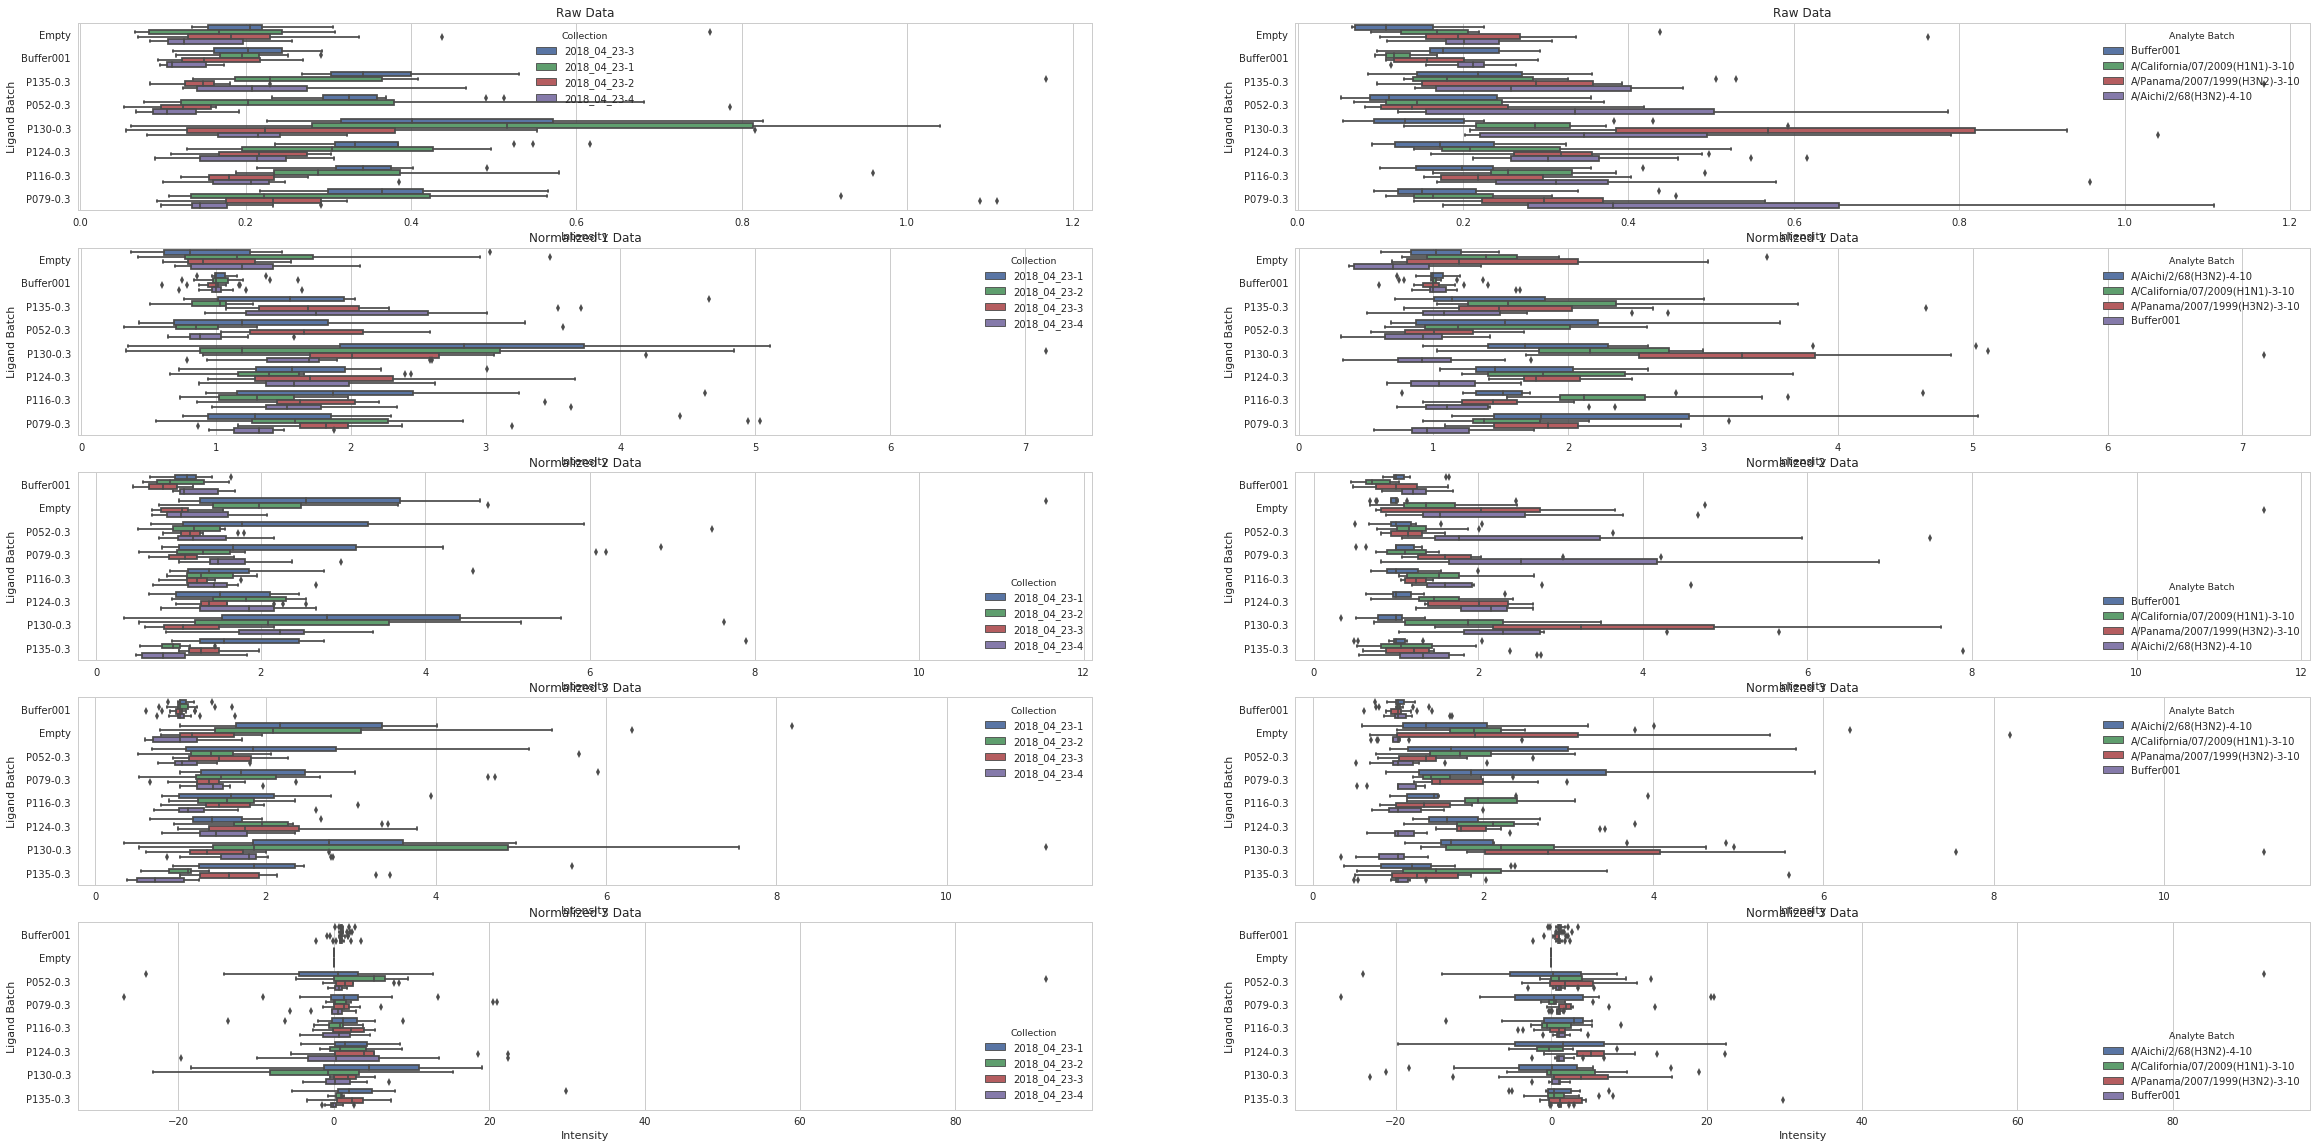

In [131]:
fig ,ax = plt.subplots(ncols=2,nrows=5,figsize=(40,20))
ax[0,0].set_title("Raw Data")
ax[0,1].set_title("Raw Data")
ax[1,0].set_title("Normalized 1 Data")
ax[1,1].set_title("Normalized 1 Data")
ax[2,0].set_title("Normalized 2 Data")
ax[2,1].set_title("Normalized 2 Data")
ax[3,0].set_title("Normalized 3 Data")
ax[3,1].set_title("Normalized 3 Data")
ax[4,0].set_title("Normalized 3 Data")
ax[4,1].set_title("Normalized 3 Data")
sns.boxplot(data=data_elisa.spots_pd, x="Intensity", hue="Collection", y="Ligand Batch", ax=ax[0,0])
sns.boxplot(data=data_elisa.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax[0,1],)
sns.boxplot(data=data_elisa_norm1.spots_pd, x="Intensity", y="Ligand Batch", hue="Collection", ax=ax[1,0])
sns.boxplot(data=data_elisa_norm1.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax[1,1],)
sns.boxplot(data=data_elisa_norm2.spots_pd, x="Intensity", y="Ligand Batch", hue="Collection", ax=ax[2,0])
sns.boxplot(data=data_elisa_norm2.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax[2,1],)
sns.boxplot(data=data_elisa_norm3.spots_pd, x="Intensity", y="Ligand Batch", hue="Collection", ax=ax[3,0])
sns.boxplot(data=data_elisa_norm3.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax[3,1],)
sns.boxplot(data=data_elisa_norm4.spots_pd, x="Intensity", y="Ligand Batch", hue="Collection", ax=ax[4,0])
sns.boxplot(data=data_elisa_norm4.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax[4,1],)

plt.show()

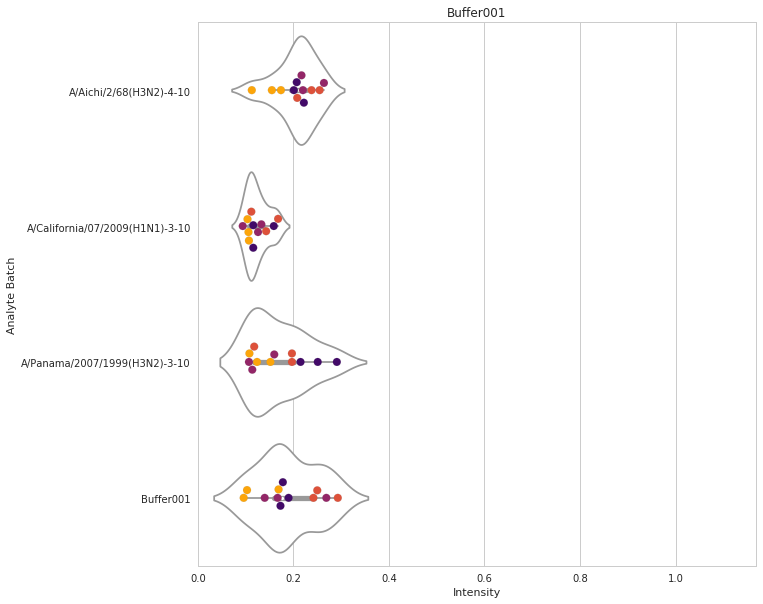

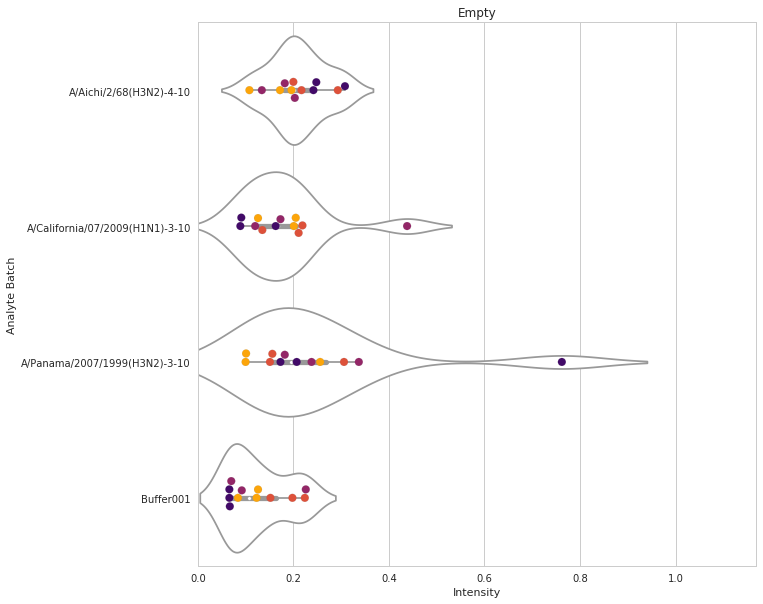

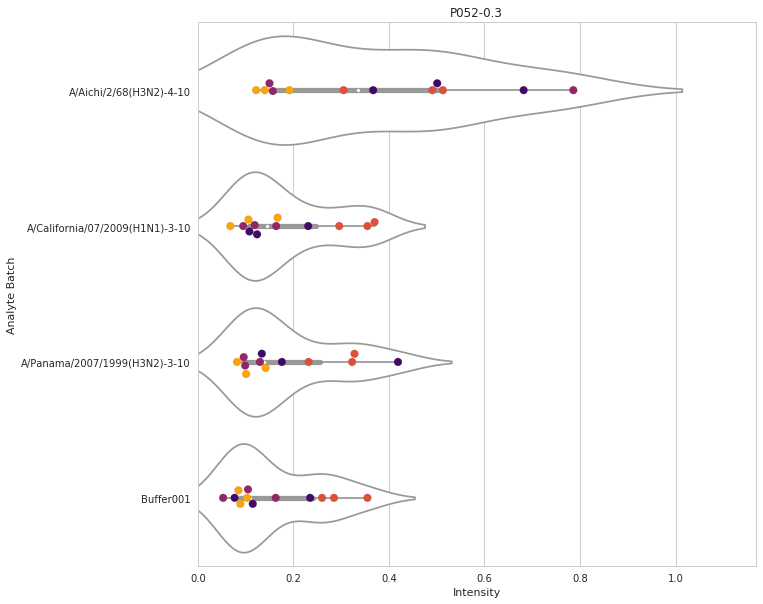

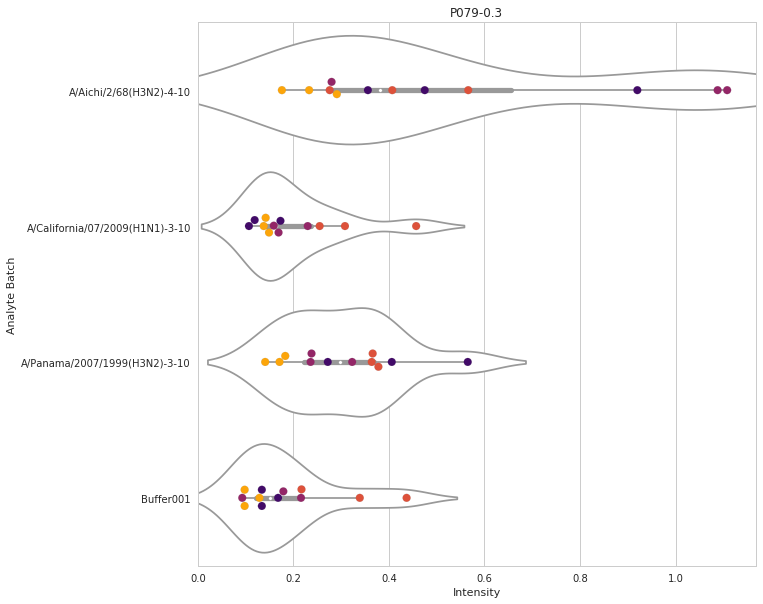

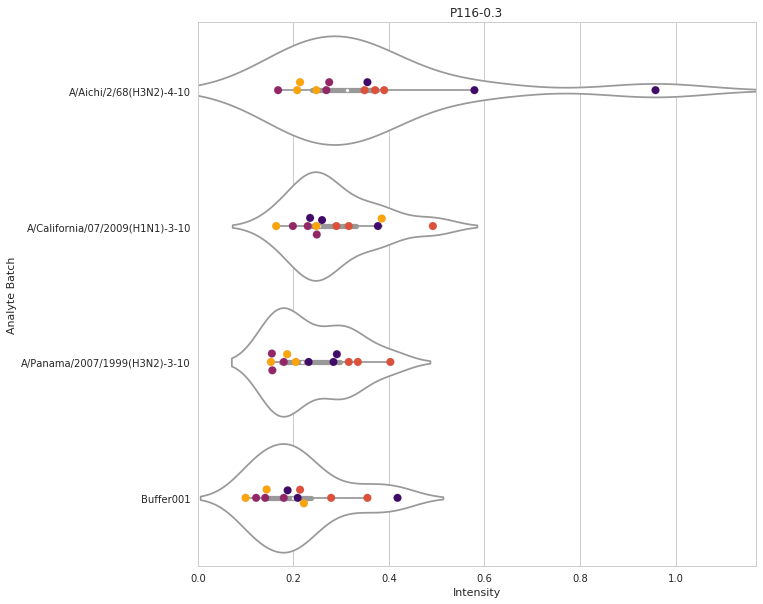

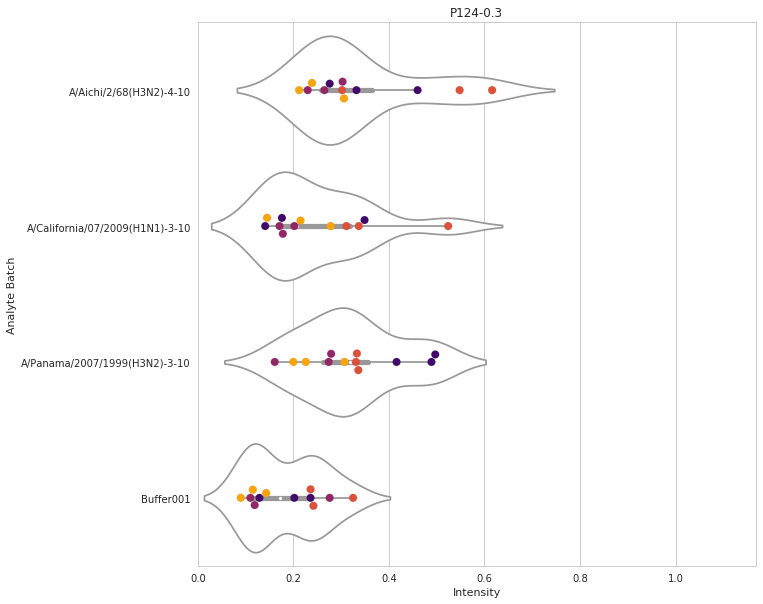

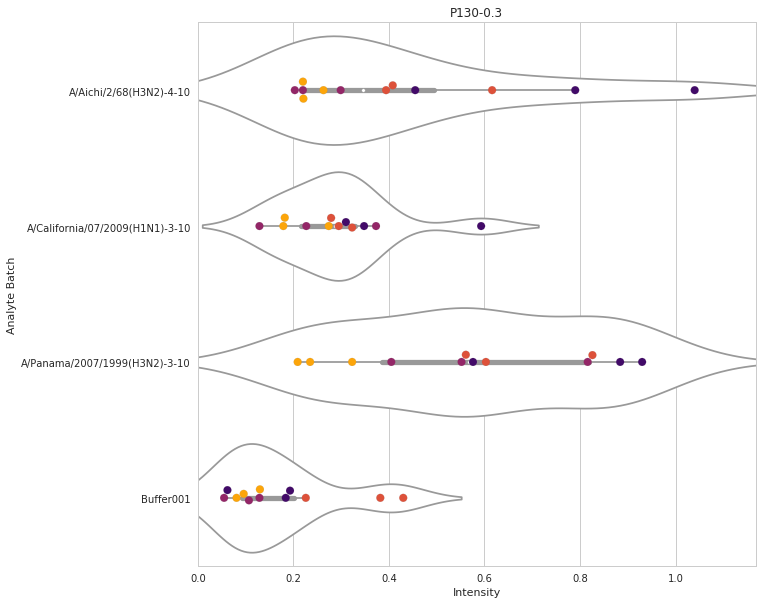

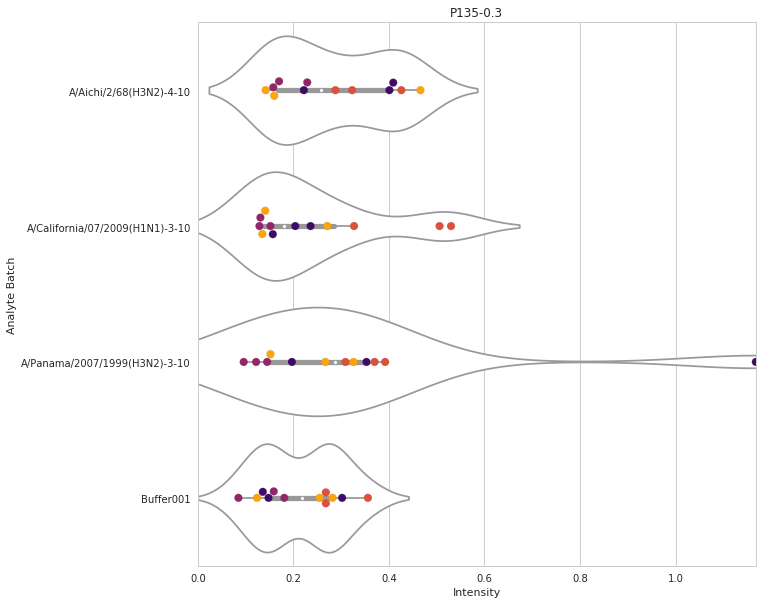

In [109]:
#x_max = data_elisa_norm1.spots_pd["Intensity"].max()
#for n,d in data_elisa_norm1.spots_pd.groupby("Ligand Batch"):
x_max = data_elisa.spots_pd["Intensity"].max()
for n,d in data_elisa.spots_pd.groupby("Ligand Batch"):
    #d = d.subset_ligand_batches(["P130-0.3"])
    fig ,ax = plt.subplots(figsize=(10,10))
    ax.set_title(n)
    ax.set_xlim([0,x_max])
    ax = sns.violinplot(y="Analyte Batch",
                        x="Intensity",
                        bw=.5, 
                        #hue="Collection",
                        scale="width", 
                        data=d.sort_values(by=["Analyte Batch", "Collection"]),
                        #split=True,
                        color="white",
                        #cut=1,

                        )
    ax = sns.swarmplot(y="Analyte Batch",
                       hue="Collection", 
                       x="Intensity",
                       palette=sns.color_palette("inferno",n_colors=4),
                       #color="white",
                       data=d.sort_values(by=["Analyte Batch", "Collection"]),
                       size=8,
                       #split=True,
                       edgecolor="grey",
                       linewidth=0.1,)

    ax.legend_.remove()
    plt.show()

 ## Correlation Plots

In [110]:
cmap = matplotlib.cm.get_cmap('Accent')

In [111]:
colors =  cmap(np.linspace(0,1,num=6))
color_list = []
for color in colors:
    for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

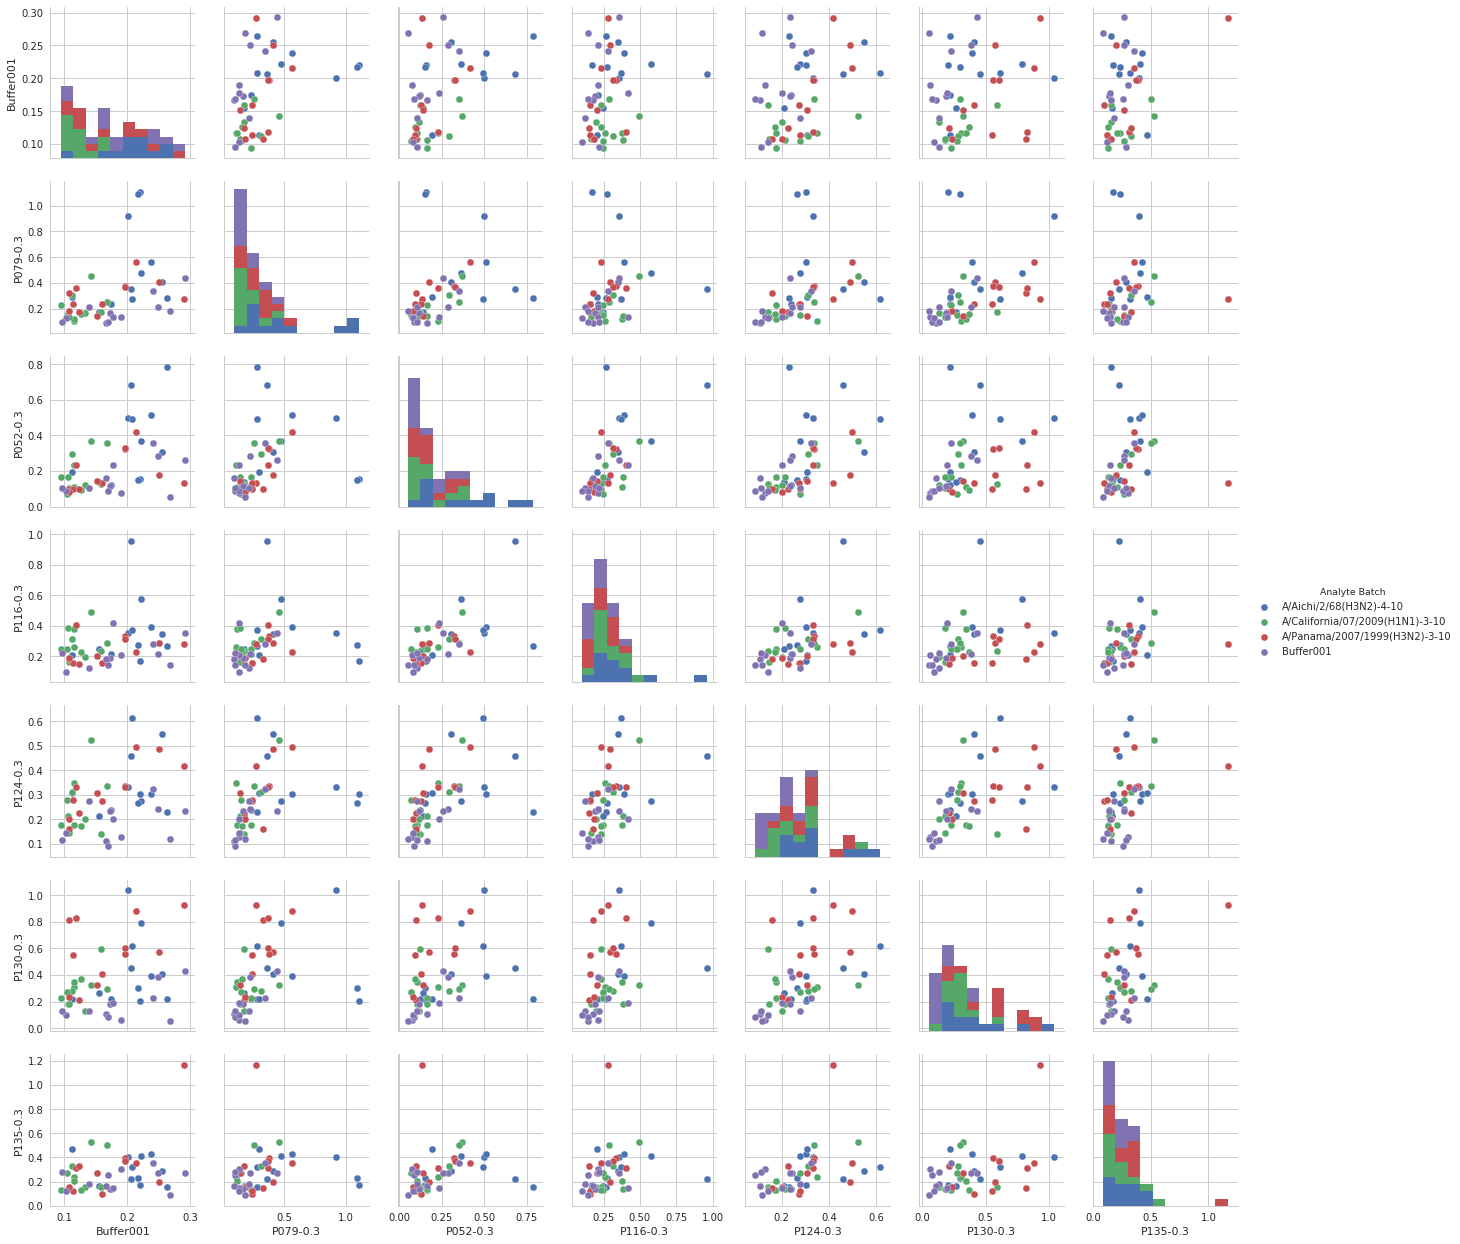

In [112]:
sns.pairplot(data=data_elisa.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"],hue="Analyte Batch")#,palette=color_list)#,markers= 6*["o","s","D"]+["x"])

In [113]:
d_analayte_x = data_elisa.spots_pd.pivot_table(values="Intensity",columns=["Ligand Batch","Analyte Batch Concentraion", "Replica"], index=["Analyte"])
d_new = d_analayte_x.transpose()

In [114]:

colors =  cmap(np.linspace(0,1,num=3))
color_list = []
for color in colors:
    #for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

Correlation of Virsues 

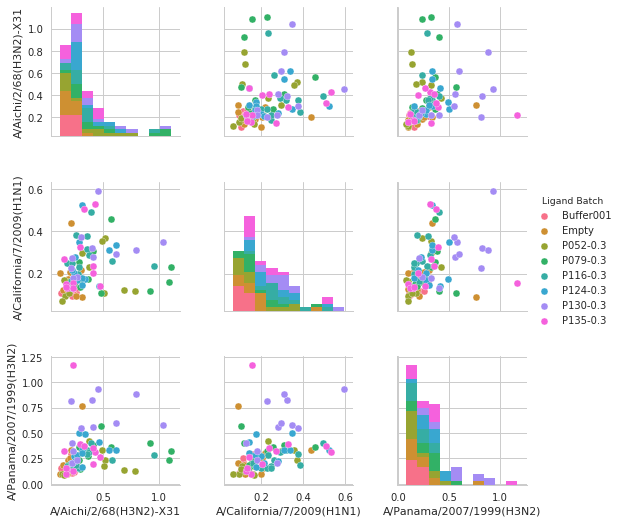

In [115]:
sns.pairplot(data=d_new.reset_index(), hue="Ligand Batch", vars=['A/Aichi/2/68(H3N2)-X31',  'A/California/7/2009(H1N1)', 'A/Panama/2007/1999(H3N2)'])

## Heat/Cluster Map

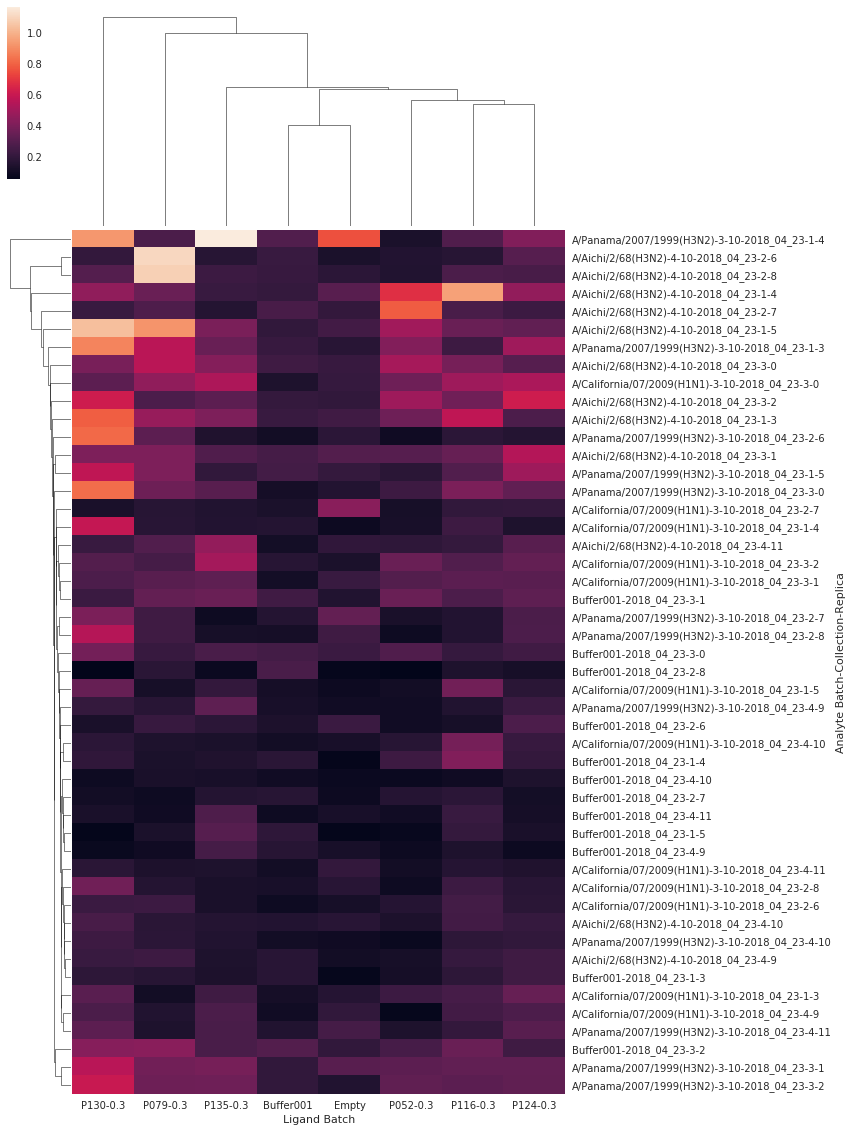

In [116]:
sns.clustermap(data_elisa.x,  method="single",figsize=(10,20))

## pca

In [117]:
model_pca = data_elisa.x_pca_fit()
elisa_pca = model_pca.transform(data_elisa.x)

In [118]:
#model_pca.scalings_

In [119]:
# creating colors for pca
le = preprocessing.LabelEncoder()
le.fit(data_elisa.y_names)
cs = le.transform(data_elisa.y_names)
colors =cs.astype(float) / cs.max()

In [120]:
trace1 = go.Scatter3d(
    x=elisa_pca[:,0],
    y=elisa_pca[:,1],
    z=elisa_pca[:,2],
    text = data_elisa.y_names+"<br>"+data_elisa.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [121]:
complete = pd.DataFrame(columns=["Test", "Train"])
com = data_elisa.collections.unique().values
for i in range(1):
    complete.set_value(i,"Test",com)
    complete.set_value(i,"Train",com)



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [122]:
#no cross-validation on different microwells possible possible without 
ana = a2.Analysis(data_elisa, train_test=complete)
ana1 = a2.Analysis(data_elisa_norm1, train_test=complete)
ana2 = a2.Analysis(data_elisa_norm2, train_test=complete)
ana3 = a2.Analysis(data_elisa_norm3, train_test=complete)
ana4 = a2.Analysis(data_elisa_norm4, train_test=complete)

ana.calculate_all()
ana1.calculate_all()
ana2.calculate_all()
ana3.calculate_all()
ana4.calculate_all()

*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****


In [123]:
def split_result(frame):
    result_dict = {}
    len_frame = int(len(frame)/3)
    result_dict["frame_NN"] = frame[:len_frame]
    result_dict["frame_DT"] = frame[len_frame:2*len_frame]
    result_dict["frame_LR"] = frame[2*len_frame:3*len_frame]
    return result_dict



In [124]:
result = split_result(ana.complete_information())
result1 = split_result(ana1.complete_information())
result2 = split_result(ana2.complete_information())
result3 = split_result(ana3.complete_information())
result4 = split_result(ana4.complete_information())


In [125]:
def render_result(data,name,ax,show=False,xlabel="",ylabel=""):
    sns.pointplot(data=data,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",ax=ax)
    for c in ax.collections:
        for of in c.get_offsets():
            ax.annotate("{:.2f}".format(of[0]), of)
    sns.swarmplot(data=data.reset_index().sort_values(by=["level_1","level_2"]),y="y",x="TrueFalse",hue="level_1",ax=ax,palette=sns.color_palette("inferno",n_colors=4))#, jitter=0.5)#, aspect=0.8)
    if not show:
        ax.legend_.remove()
    ax.set_title(name)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    

## Classification Results

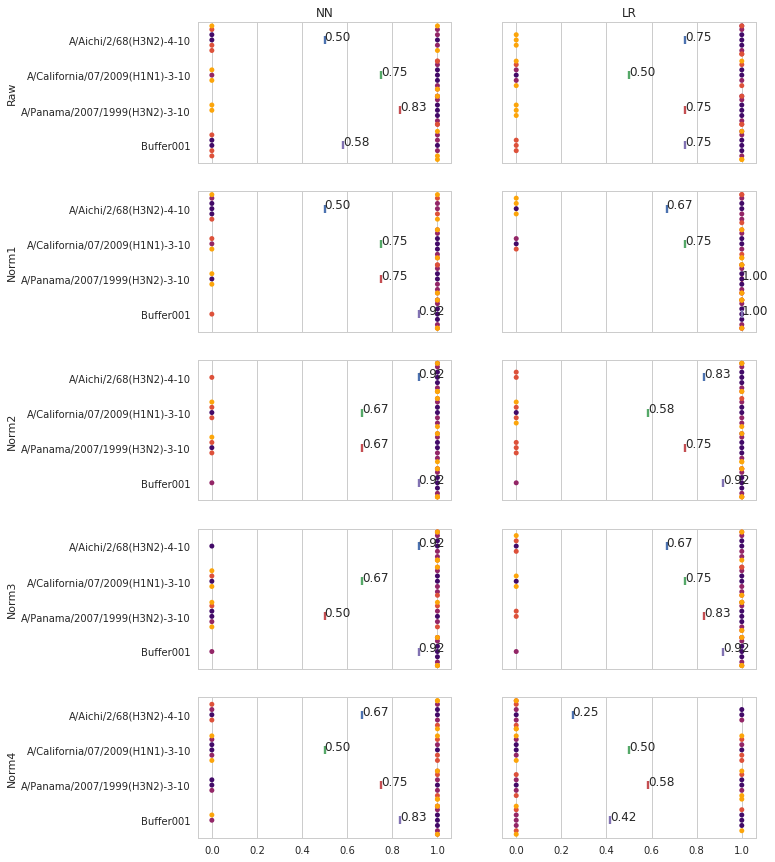

In [126]:
fig, ax = plt.subplots(ncols=2,nrows=5, figsize=(10,15),sharex=True, sharey=True)
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
render_result(result["frame_NN"], "NN", ax[0,0],ylabel="Raw")
#render_result(result["frame_DT"], "DT",ax[0,1])
render_result(result["frame_LR"], "LR",ax[0,1])
render_result(result1["frame_NN"], "", ax[1,0],ylabel="Norm1")
#render_result(result1["frame_DT"], "",ax[1,1])
render_result(result1["frame_LR"], "",ax[1,1])
render_result(result2["frame_NN"], "", ax[2,0],ylabel="Norm2")
#render_result(result2["frame_DT"], "",ax[2,1])
render_result(result2["frame_LR"], "",ax[2,1])
render_result(result3["frame_NN"], "", ax[3,0],ylabel="Norm3")
#render_result(result3["frame_DT"], "",ax[3,1],show=True)
render_result(result3["frame_LR"], "",ax[3,1])
render_result(result4["frame_NN"], "", ax[4,0],ylabel="Norm4")
#render_result(result3["frame_DT"], "",ax[3,1],show=True)
render_result(result4["frame_LR"], "",ax[4,1])